In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal

In [55]:
# Loading the ecg data in pandas dataframe
ecg_1 = pd.read_csv('./data/ecg_1.csv', index_col=0).set_index('time', drop=True)
sampling_rate_1 = 1 / (ecg_1.index[1] - ecg_1.index[0])
print(sampling_rate_1)

ecg_2 = pd.read_csv('./data/ecg_2.csv', index_col=0).set_index('time', drop=True)
sampling_rate_2 = 1 / (ecg_2.index[1] - ecg_2.index[0])
sampling_rate_2

256.00036680005894


256.00184848376676

In [56]:
# Searching QRS point in Ecg signal
def find_R_peaks(ecg_signal, sampling_rate):
    peaks, _ = signal.find_peaks(ecg_signal, distance=0.3*sampling_rate, height=500)
    return peaks

In [57]:
peaks_1 = find_R_peaks(ecg_1.ecg, sampling_rate_1)
peaks_2 = find_R_peaks(ecg_2.ecg, sampling_rate_2)

In [58]:
# Heart rate from Ecg signal
def freq_from_peaks(peaks, sampling_rate):
    peaks = peaks.astype(float) 
    distances = np.diff(peaks)
    distances /= sampling_rate
    freq = 1. / distances
    freq_mean = np.mean(freq)
    freq_std = np.std(freq)
    return freq_mean, freq_std

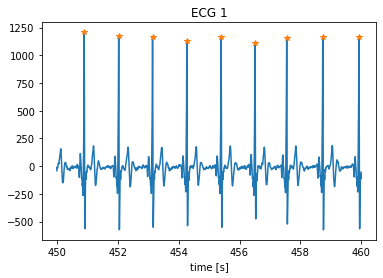

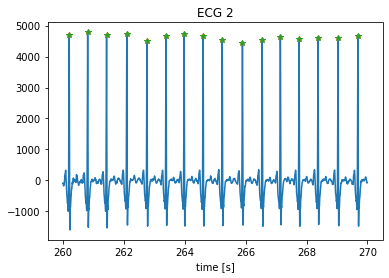

In [59]:
# plotting the Ecg signal
plt.figure()
plt.plot(ecg_1)
plt.title('ECG 1')
plt.xlabel('time [s]')
plt.plot(ecg_1.index[peaks_1], ecg_1.ecg.iloc[peaks_1], '*');

plt.figure()
plt.plot(ecg_2)
plt.plot(ecg_2.index[peaks_2], ecg_2.ecg.iloc[peaks_2], '*');
plt.title('ECG 2')
plt.xlabel('time [s]')
# Plot the peaks
plt.plot(ecg_2.index[peaks_2], ecg_2.ecg.iloc[peaks_2], '*');
### END SOLUTION

In [60]:
hr_mean_1, hr_std_1 = freq_from_peaks(peaks_1, sampling_rate_1)
hr_mean_2, hr_std_2 = freq_from_peaks(peaks_2, sampling_rate_2)

print(f"The heart rate ECG signal 1 is {hr_mean_1 * 60:.2f} bpm (+/- {hr_std_1 * 60:.2f} )")
print(f"The heart rate ECG signal 2 is {hr_mean_2 * 60:.2f} bpm (+/- {hr_std_2 * 60:.2f} )")

The heart rate ECG signal 1 is 53.25 bpm (+/- 2.13 )
The heart rate ECG signal 2 is 95.02 bpm (+/- 3.44 )
